# Steady-state solutions of the revised AKPR model for TCR/CAR antagonism

This notebook is a stand-alone implementation of the revised AKPR model for TCR/TCR antagonism and TCR/CAR antagonism. It can be used to explore various aspects of the steady-state solutions. 

## Provided functions
In addition to core solution functions, we provide the following user interface-level functions:
- Function `steady_akpr_i_1ligand`: which evaluates the steady-state solution for one receptor type (either TCR or CAR, same function). This is needed to compute the CAR antigen alone or TCR antigen alone outputs used in the denominator of fold-changes $FC$. 
- Function `steady_akpr_i_2ligands`: to evaluate the steady-state solution for a binary mixture of TCR antigens, for TCR/TCR antagonism. 
- Function `steady_akpr_i_receptor_types`: to evaluate the steady-state solution (all $C^\rho_n$, $n \in [0, \ldots, N^{\rho}]$ complexes and the active inhibitory species $I^{\rho}$) for a given choice of TCR and CAR antigen quantities, $L^T$ and $L^C$, and binding times $\tau^T$ and $\tau^C$. 

To compute antagonism $FC$ from these functions, compute the output for the agonist only, then compute the output for the mixture, and compute the ratio. 

Moreover, we provide a function to evaluate the model solutions on a range of conditions:
- The function `compute_fc_tcr_car_curve` computes, for a given CAR antigen affinity and density, a matrix of TCR/CAR antagonism fold-changes for an array of TCR antigen quantities and binding times. 

The supplemental information of Kondo, Bourassa, Achar *et al*., *Cell*, 2025 contains all the mathematical details on the model and the solution methods. We provide the equations in the box below. 

### Antigen binding times $\tau^\rho$ and quantities $L^\rho$

This notebook is purely about the model, without relying on separate scripts and data files, so it is **not** 1) loading peptide EC50s and converting them to binding times, nor 2) loading APC surface molecule abundance data, computing the mean MHC and CAR antigen levels, and also computing the number of loaded MHCs with a given TCR antigen, based on the pulse concentration (for in vitro) or the response of the 4996 TCR (for p53). Here, we wanted to provide a simple notebook to explore the mathematical model without adding these extra layers of code and experimental details. 

We suggest examining the model behavior for typical parameter values based on the actual experimental calibrations used in the paper:
- $\tau^T$: TCR antigen binding times, typically $0.5 -- 10$ s
- $\tau^C$: CAR antigen binding times, typically $500$ s to reflect the fact that CARs have an affinity for their ligands 100-1000x larger than TCRs. 
- $L^T$: number of TCR antigens per APC, ranging anywhere between 1 and 1,000,000
- $L^C$: number of CAR antigens per APC, typically around 100,000 -- 1,000,000


## TCR/TCR model equations
Solving for steady-state, we find the following expressions for the numbers of bound TCRs in various proofreading stages $n$ for each type of antigen and the numbers of activated inhibitory molecules $I$. 

The numbers of receptors in each proofreading state are, for each antigen $l$ of strength $\tau_l$,

$$ C_{n,l} = \frac{R_{b,l}}{\varphi^T \tau_l + 1} \Phi_l^n \quad (0 \leq n < N^T - f^T) $$
$$ C_{n,l} = \frac{R_{b,l}}{\psi(I) \tau_l + 1} \Phi_l^{N^T - f^T} \Phi_{I,l}^{n - N^T + f^T} \quad (N^T - f^T \leq n < N^T) $$
$$ C_{N^T,l} = R_{b,l} \Phi_l^{N^T - f^T} (\Phi_{I,l})^{f^T}   $$

where we defined the regular and inhibited proofreading factors

$$ \Phi_l = \left( \frac{\varphi \tau_l}{\varphi \tau_l + 1}\right) $$ 
$$ \Phi_{I,k} = \left( \frac{\psi(I) \tau_l}{\psi(I) \tau_l + 1}\right) $$

with 

$$ \psi(I) = \varphi \frac{(I_{\mathrm{th}})^{k_I}}{(I_{\mathrm{th}})^{k_I} + I)^{k_I}} + \psi_0 \,\, .$$

The inhibitory molecule $I$ is activated out of a total pool of inhibitory molecules $I_{\mathrm{tot}}$ by the complexes $C_{m, l}$, such that

$$ I = I_{tot} \frac{\sum_l C_{m, l} / C_{m, \mathrm{th}}}{1 + \sum_l C_{m, l} / C_{m, \mathrm{th}}}  \,\,. 
$$ 

The total numbers of bound receptors are derived by expressing $R_{b, 2}$ in terms of $R_{b, 1}$, 
$$ R_{b, 2} = R_{\mathrm{tot}} - R_{b, 1} - \frac{R_{b, 1}}{\kappa \tau_1(L_1 - R_{b, 1})} $$
and solving the resulting cubic equation for $R_{b, 1}$, 
$$ p_0 ({R_{b, 1}})^3 + p_1 ({R_{b, 1}})^2 + p_2 {R_{b, 1}} + p_3 = 0 $$
where the coefficients are
$$ p_0 = \frac{\tau_1}{\tau_2} - 1 $$
$$ p_1 = -\left(\frac{\tau_1}{\tau_2} - 1 \right) \left( R_{\mathrm{tot}} + L_1 + \frac{1}{\kappa \tau_1} \right) - L_2 - \frac{\tau_1}{\tau_2} L_1 $$
$$ p_2 = \frac{\tau_1}{\tau_2} L_1^2 + \left(2\frac{\tau_1}{\tau_2} - 1 \right) R_{\mathrm{tot}} L_1 + \frac{L_1}{\kappa \tau_2} + L_1 L_2 $$
$$ p_3 = -\frac{\tau_1}{\tau_2} R_{\mathrm{tot}} {L_1}^2 $$
The physically correct solution is the only root satisfying $0 \leq R_{b, 1} < L_1$. It always exists and ensures $0 \leq R_{b, 2} < L_2$ and $R_{b,1} + R_{b,2} < R_{\mathrm{tot}}$ too. 


## TCR/CAR model equations
Solving for steady-state, we find the following expressions for the numbers of bound TCRs in various proofreading stages $n$, the numbers of bounds CARs in various stages, and the numbers of activated inhibitory molecules by each receptor type. 

The numbers of receptors in each proofreading state are, for each receptor type $\rho$,

$$ C^{\rho}_n = \frac{R^{\rho}_b}{\varphi^{\rho} \tau^{\rho} + 1} (\Phi^{\rho})^n \quad (0 \leq n < N^{\rho} - f^{\rho}) $$
$$ C^{\rho}_n = \frac{R^{\rho}_b}{\psi^{\rho}(\vec{I}) \tau^{\rho} + 1} (\Phi^{\rho})^{N^{\rho} - f^{\rho}} (\Phi^{\rho}_{\vec{I} })^{n - N^{\rho} + f^{\rho}} \quad (N^{\rho} - f^{\rho} \leq n < N^{\rho}) $$
$$ C^{\rho}_{N^{\rho}} = R^{\rho}_b (\Phi^{\rho})^{N^{\rho} - f^{\rho}} (\Phi^{\rho}_{\vec{I}})^{f^{\rho}}   $$

where we again defined the regular and inhibited proofreading factors

$$ \Phi^{\rho} = \left( \frac{\varphi^{\rho} \tau^{\rho}}{\varphi^{\rho} \tau^{\rho} + 1}\right) $$ 
$$ \Phi^{\rho}_{\vec{I}} = \left( \frac{\psi^{\rho}(\vec{I}) \tau^{\rho}}{\psi^{\rho}(\vec{I}) \tau^{\rho} + 1}\right) $$

with 

$$     \psi^{\rho}(\vec{I}) = \varphi^{\rho} \frac{(I^{\rho}_{\mathrm{th}})^{k^{\rho}_I}}{(I^{\rho}_{\mathrm{th}})^{k^{\rho}_I} + (\sum_{\mu} {\gamma^{\rho}}_{\mu} I^{\mu})^{k^{\rho}_I}} + \psi^{\rho}_0 \,\, .$$

Each form $I^{\rho}$ is activated out of a total pool of inhibitory molecules $I_{\mathrm{tot}}$ by the complexes $C^{\rho}_{m^{\rho}}$, such that

$$ I^{\rho} = I_{tot} \frac{C^{\rho}_{m^{\rho}} / C^{\rho}_{m, \mathrm{th}}}{1 + \sum_{\mu} (C^{\mu}_{m^{\mu}} / C^{\mu}_{m, \mathrm{th}})}  \,\,. 
$$ 

The total number of bound receptors are given by quadratic formulas,

$$ R^T_b = \sum_{n=0}^{N^T} C^T_n = \frac12 \left(L^T + R^T + \frac{1}{\kappa^T \tau^T}\right) - \frac12 \sqrt{\left(L^T + R^T + \frac{1}{\kappa^T \tau^T}\right)^2 - 4 L^T R^T} $$

$$ R^C_b = \sum_{n=0}^{N^C} C^C_n = \frac12 \left(L^C + R^C + \frac{1}{\kappa^C \tau^C}\right) - \frac12 \sqrt{\left(L^C + R^C + \frac{1}{\kappa^C \tau^C}\right)^2 - 4 L^C R^C} \,\, .$$

The $\gamma$ matrix controls how each receptor type inhibits itself and the other. Note that equations for $I^T$ and $I^C$ are implicit if either $C^T_{m_T}$ or $C^C_{m_C}$ depend on $I$, which happens if $m^T \geq N^T - f^T$ or $m^C \geq N^C - f^C$. Unless that happens, the feedback is in reality an incoherent feedforward interaction and the solution is completely analytical. 

Lastly, the fully activated TCR and CAR numbers, $C^T_{N^T}$ and $C^C_{N^C}$, are passsed in a Michaelis-Menten activation function, with the threshold set by the receptor outputs of a large number of ligands of threshold binding times $\tau^T_c$ $\tau^C_c$ (these threshold $\tau$ are two fitted parameters in the MCMC simulations). 

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import root as rootsolve, root_scalar

import matplotlib.pyplot as plt

## TCR/TCR antagonism

### Sub-functions used by the main functions

In [2]:
### SUB-FUNCTIONS ###

# Solving for C_T and D_T numerically (without the non-saturation approximation)
# Without antagonism, solution of f(L) = 0
def solution_CT(Lp, taup, kappap, Rp):
    """ Solves the quadratic equation for C_T without antagonism.
    Can also be used vectorially with L1p, tau1p, kappap, Rp being arrays
    of parameter values for the different receptor types.
    """
    bterm = Lp + Rp + 1/(kappap*taup)
    r_sol = 0.5 * bterm - 0.5*np.sqrt(bterm**2 - 4*Lp*Rp)
    return r_sol


# This solves for C_T and D_T, switching to a simple quadratic equation if L2 is 0.
def solve_CT_DT(lsp, tausp, kappap, Rp):
    """ Use the np.roots function to solve the cubic equation
    that results for C_T after substitution of D_T(C_T).
    The roots are found within machine precision,
    since there is an exact formula for cubic. """
    # If there is a single ligand, really:
    L1p, L2p = lsp
    tau1p, tau2p = tausp
    if L1p < 1e-12 or tau1p < 1e-12:
        c_t, d_t = (0.0, solution_CT(L2p, tau2p, kappap, Rp))
        return c_t, d_t
    elif L2p < 1e-12  or tau2p < 1e-12:
        c_t, d_t = (solution_CT(L1p, tau1p, kappap, Rp), 0.0)
        return c_t, d_t

    # Solving the first equation for D_T(C_T) and inserting in the second, we get
    # a cubic equation for C_T with coefficients
    p = np.zeros(4)
    p[0] = tau1p / tau2p - 1.
    p[1] = Rp + L1p - L2p - tau1p/tau2p * (Rp + 2.*L1p) - 1. / (kappap * tau2p) + 1. / (kappap * tau1p)
    p[2] = tau1p / tau2p * L1p * (2.*Rp + L1p) + L1p / (kappap * tau2p) - Rp * L1p + L1p * L2p
    p[3] = -tau1p / tau2p * Rp * L1p**2
    c_ts = np.roots(p)

    # Keep only real roots that are in [0, min(L_1, R)]
    isreal = (np.abs(np.imag(c_ts)) < 1e-14)
    isrange = (np.real(c_ts) >= 0.)*(np.real(c_ts) <= min(Rp, L1p))
    c_ts = np.real(c_ts[np.logical_and(isreal, isrange).astype(bool)])

    # There should already be a single root left in the correct range
    if len(c_ts) > 1:
        print("Many C_T solutions in the correct range:", c_ts)

    # Lastly, enforce D_T in the correct range too, to make sure.
    d_ts = Rp - c_ts - c_ts / (kappap * tau1p * (L1p - c_ts))
    d_isrange = ((d_ts >= 0.)*(d_ts <= min(Rp, L2p))).astype(bool)

    if np.sum(d_isrange) != 1:
        print("There are either no roots or too many; " +
        "we found D_T = {} when L_2={}, R={}".format(d_ts, L2p, Rp))
        d_ts = np.clip(d_ts, a_min=0.0, a_max=min(Rp, L2p))
        d_isrange = True
    c_ts = float(c_ts[d_isrange][0])
    d_ts = float(d_ts[d_isrange][0])
    return c_ts, d_ts  # C_T and D_T


## Negative feedback functions: psi(S), and solving for S in implicit cases
def psi_of_i(i, ithresh, ki, phip, psi0):
    return phip / (1.0 + (i / ithresh)**ki) + psi0


# Solving implicit equation for I when m >= N - f
def equation_i_1ligand(i, ratesp, tau1p, ctot, itot, nmf):
    phip, kappap, Csp, I0p, kp, psi0 = ratesp
    geofact = phip*tau1p / (phip*tau1p + 1.0)
    psi_i = psi_of_i(i, I0p, kp, phip, psi0)

    # Compute C_m given the tentative I
    # If m == N - f, rate into it is phi, out of it is psi
    n_minus_f = nmf[0] - nmf[2]
    cm = geofact**n_minus_f * ctot / (psi_i*tau1p + 1.0)
    # If m is larger than that, but smaller than N, this is
    # some complex between N-f and the last
    if nmf[1] > n_minus_f:
        n_extra = min(nmf[1] - n_minus_f, nmf[2]-1)  # In case m == N, clip to f-1
        geofact2 = psi_i*tau1p / (psi_i*tau1p + 1.0)
        cm = cm * geofact2**n_extra
        if nmf[1] == nmf[0]:  # Last complex: special factor
            cm = cm * psi_i*tau1p

    # Compute the activation function F in I = F(C_m(I))
    activ_fct_i = itot * cm / (cm + Csp)
    return i - activ_fct_i


# Solving implicit equation for I when m >= N - f
def equation_i_2ligands(i, ratesp, tausp, c_d_tot, itot, nmf):
    phip, kappap, Csp, I0p, kp, psi0 = ratesp
    tau1p, tau2p = tausp
    geofact1 = phip*tau1p / (phip*tau1p + 1.0)
    geofact2 = phip*tau2p / (phip*tau2p + 1.0)
    psi_i = psi_of_i(i, I0p, kp, phip, psi0)
    ctot, dtot = c_d_tot

    # Compute C_m and D_m given the tentative s
    # If m == N - f, rate into it is phi, out of it is psi
    n_minus_f = nmf[0] - nmf[2]
    cm = geofact1**n_minus_f * ctot / (psi_i*tau1p + 1.0)
    dm = geofact2**n_minus_f * dtot / (psi_i*tau2p + 1.0)
    # If m is larger than that, but smaller than N, this is
    # some complex between N-f and the last
    if nmf[1] > n_minus_f:
        n_extra = min(nmf[1] - n_minus_f, nmf[2]-1)  # In case m == N, clip to f-1
        geofact12 = psi_i*tau1p / (psi_i*tau1p + 1.0)
        geofact22 = psi_i*tau2p / (psi_i*tau2p + 1.0)
        cm = cm * geofact12**n_extra
        dm = dm * geofact22**n_extra
        if nmf[1] == nmf[0]:  # Last complex: special factor
            cm = cm * psi_i*tau1p
            dm = dm * psi_i*tau2p
    cdm = cm + dm

    # Compute the activation function F in I = F(C_m(I))
    activ_fct_i = itot * cdm / (cdm + ratesp[2])
    return i - activ_fct_i

### Main model functions for 1 receptor type

In [3]:
### MAIN MODEL FUNCTION FOR ONE RECEPTOR TYPE ###
# Special version of the AKPR with I model solution with a single ligand, faster to compute.
def steady_akpr_i_1ligand(ratesp, tau1p, L1p, ri_tots, nmf, large_l=False):
    """ Solving for the steady_state of the I model for a single ligand type.

    Args:
        ratesp (list): phi, kappa, beta/alpha, I0p, kp, phi0
        tau1p (float): binding time of the agonists
        L1p (float): number of agonist ligands
        ri_tots (list of 2 floats): [R_tot, I_tot]
            total number of receptors
            total number of inhibitory molecules (hint: keep to one)
        nmf (list of 3 ints): [N, m, f]
            Np (int): the number of phosphorylated complexes in the cascade
            mp (int): complex mediating negative feedback (I phosphorylation)
            fp (int): last f steps receive negative feedback.
        large_l (bool): if True, take L_F -> infinity, implying C_T=R
    Returns:
        complexes (np.ndarray): 1D array of complexes, ordered as
            [C_0, C_1, ..., C_N, I]
    """
    # Rates
    phip, kappap, Csp, I0p, kp, psi0 = ratesp
    Rp, ITp = ri_tots
    Np, mp, fp = nmf
    #if mp >= Np - fp:
    #    raise NotImplementedError("Can't use m >= N-f, it requires a numerical solution")

    # Solve for C_T and D_T
    if large_l:
        CT = Rp
    else:
        CT = solution_CT(L1p, tau1p, kappap, Rp)
    #CT = kappa*Rp*L1p*tau1p / (kappa*Rp*tau1p + 1.0)

    # Quantities that come back often
    geofact = phip*tau1p / (phip*tau1p + 1.0)

    # Compute all Cns and Dns below N-f: apply same factor recursively
    # Note: if N-f = 0, complexes[0] will be changed below, that's OK
    complexes = np.zeros(Np + 2)
    complexes[0] = CT / (phip*tau1p + 1.0)
    for n in range(1, Np-fp):
        complexes[n] = complexes[n-1]*geofact

    # Now, compute I and psi(I)
    # If mp < Np - fp, we have already computed C_m, this is feedforward.
    if mp < Np - fp:
        complexes[-1] = ITp * complexes[mp] / (complexes[mp] + Csp)
    # Else, we need to determine I numerically from an implicit equation
    # I = F(C_m(I)).
    else:
        res = root_scalar(equation_i_1ligand, args=(ratesp, tau1p, CT, ITp, nmf),
                                   bracket=[0.0, ITp], x0=ITp/2.0, rtol=1e-6)
        if res.converged:
            complexes[-1] = res.root
        else:
            raise RuntimeError("I solution did not converge; flag {}".format(res.flag))

    # From S, compute the phosphorylation of the last f+1 complexes
    psi_i = psi_of_i(complexes[-1], I0p, kp, phip, psi0)

    # Finally, compute C_{N-f} to C_N
    if Np - fp > 0:
        complexes[Np-fp] = complexes[Np-fp-1] * phip*tau1p / (psi_i*tau1p + 1.0)
    elif Np - fp == 0:  # change C_0 to correct expression
        complexes[Np-fp] = CT / (psi_i*tau1p + 1.0)
    geofact = psi_i*tau1p / (psi_i*tau1p + 1.0)
    for n in range(Np-fp+1, Np):
        complexes[n] = complexes[n-1] * geofact
    complexes[Np] = complexes[Np-1] * psi_i*tau1p

    return complexes


# Solution for a binary mixture of antigens
def steady_akpr_i_2ligands(ratesp, tausp, lsp, ri_tots, nmf):
    """ Solving for the steady_state of the I model with a mixture of
    two ligands (or only one by inputting L2p=0).

    Args:
        ratesp (list): phi, kappa, beta/alpha, I0p, kp, psi0
        tausp (list of 2 floats): binding times of the ligands
        lsp (list of 2 floats): [L1, L2], numbers of ligands
        ri_tots (list of 2 floats): [R_tot, I_tot]
            total number of receptors
            total number of phosphatase molecules (hint: keep to one)
        nmf (list of 3 ints): [N, m, f]
            Np (int): the number of phosphorylated complexes in the cascade
            mp (int): complex mediating negative feedback (I phosphorylation)
            fp (int): last f steps receive negative feedback.
    Returns:
        complexes (list of np.ndarrays): list of arrays of complexes, containing
            [C_0, C_1, ..., C_N], 
            [D_0, D_1, ..., D_N], 
            [I]
    """
    # Rates
    phip, kappap, Csp, I0p, kp, psi0 = ratesp
    Rp, ITp = ri_tots
    Np, mp, fp = nmf
    tau1p, tau2p = tausp

    # Solve for C_T and D_T
    CT, DT = solve_CT_DT(lsp, tausp, kappap, Rp)

    # Quantities that come back often
    geofact1 = phip*tau1p / (phip*tau1p + 1.0)
    geofact2 = phip*tau2p / (phip*tau2p + 1.0)

    # Compute all Cns and Dns below N-f: apply same factor recursively
    # Note: if N-f = 0, complexes[0] and Np+1 will be changed below, that's OK
    complexes = np.zeros(2*Np + 3)  # 2*(N+1) + I
    complexes[0] = CT / (phip*tau1p + 1.0)
    complexes[Np+1] = DT / (phip*tau2p + 1.0)
    for n in range(1, Np-fp):
        complexes[n] = complexes[n-1]*geofact1
        complexes[Np+1+n] = complexes[Np+n]*geofact2

    # Now, compute I and psi(I)
        # Now, compute I and psi(I)
    # If mp < Np - fp, we have already computed C_m, this is feedforward.
    if mp < Np - fp:
        cdm = complexes[mp] + complexes[mp+Np+1]
        complexes[-1] = ITp * cdm / (cdm + Csp)
    # Else, we need to determine I numerically from an implicit equation
    # I = F(C_m(I)).
    else:
        res = root_scalar(equation_i_2ligands, args=(ratesp, tausp, [CT, DT], ITp, nmf),
                                   bracket=[0.0, ITp], x0=ITp/2.0, rtol=1e-6)
        if res.converged:
            complexes[-1] = res.root
        else:
            raise RuntimeError("I solution did not converge; flag {}".format(res.flag))

    psi_i = psi_of_i(complexes[-1], I0p, kp, phip, psi0)

    # Finally, compute C_{N-f}, D_{N-f} to C_N and D_N
    if Np - fp > 0:
        complexes[Np-fp] = complexes[Np-fp-1] * phip*tau1p / (psi_i*tau1p + 1.0)
        complexes[2*Np-fp+1] = complexes[2*Np-fp] * phip*tau2p / (psi_i*tau2p + 1.0)
    else:  # Correct C_0, D_0
        complexes[Np-fp] = CT / (psi_i*tau1p + 1.0)
        complexes[2*Np-fp+1] = DT / (psi_i*tau2p + 1.0)
    geofact1 = psi_i*tau1p/ (psi_i*tau1p + 1.0)
    geofact2 = psi_i*tau2p/ (psi_i*tau2p + 1.0)
    for n in range(Np-fp+1, Np):
        complexes[n] = complexes[n-1]*geofact1
        complexes[n+Np+1] = complexes[n+Np]*geofact2

    complexes[Np] = complexes[Np-1] * psi_i*tau1p
    complexes[2*Np+1] = complexes[2*Np] * psi_i*tau2p
    
    # Reorder complexes for easier outside use
    complexes_list = [
        complexes[:Np+1], 
        complexes[Np+1:2*Np+2], 
        complexes[-1:]
    ]

    return complexes_list

### Main function computing an antagonism $FC_{\mathrm{TCR/TCR}}$ curve

For TCR/TCR antagonism, the model steady-state $C_N$ are directly used as outputs, since $C_{N,1}$ and $C_{N,2}$ for the two ligand types have comparable scales and can be directly  combined. 

In [4]:
def compute_fc_tcr_tcr_curve(tau_tcr_range, l_tcr_range, tcr_ag, p):
    """ For one given TCR agonist condition (L^T_1, tau^T_1), and a range
    of TCR antagonist binding times and concentrations (L^T_2, tau^T_2)
    compute the TCR/TCR fold-change. 
    
    The steady-state $C_{N,l}$ values are directly combined since this
    is one receptor type. 
    
    Args:
        tau_tcr_range (np.ndarray): range of TCR antagonis binding times
        l_tcr_range (np.ndarray): range of TCR antagonist ligand numbers
        tcr_ag (tuple of 2 floats): tau, L of the TCR agonist
        p (dict): dictionary of model parameters
            "rates": AKPR model rates: phi, kappa, C_{m, th}, k_I, psi0
            "ri_tots": [R_tot, I_tot]
            "nmf": N, m, f of the TCR
    
    Returns:
        df_m (pd.DataFrame): model results Dataframe with index levels for L_2 and tau_2, 
            containing the individual TCR antagonist output, C_N_2, and the fold-change 
            (C_N_1 + C_N_2) / C_N(agonist alone). 
        ag_alone (float): TCR output (C_N2) in response to the CAR antigen alone. 
    """
    # Compute the TCR agonist only output
    ag_alone = steady_akpr_i_1ligand(p["rates"], *tcr_ag, p["ri_tots"], p["nmf"])[p["nmf"][0]]
    
    # Prepare Dataframe, add a zero TCR condition for CAR antigen alone
    model_columns = pd.Index(["C_N_2", "Ratio"], name="Variable")
    model_index = pd.MultiIndex.from_product([l_tcr_range, tau_tcr_range], 
                    names=[r"L_2", r"tau_2"])
    df_m = pd.DataFrame(np.zeros([len(model_index), len(model_columns)]), 
                           columns=model_columns, index=model_index)

    for l_2, tau_2 in model_index:
        taus = np.asarray([tcr_ag[0], tau_2])
        lvec = np.asarray([tcr_ag[1], l_2])
        complexes_mix = steady_akpr_i_2ligands(p["rates"], taus, lvec, p["ri_tots"], p["nmf"])
        c_n_1 = complexes_mix[0][p["nmf"][0]]
        c_n_2 = complexes_mix[1][p["nmf"][0]]
        df_m.loc[(l_2, tau_2), "C_N_1"] = c_n_1
        df_m.loc[(l_2, tau_2), "C_N_2"] = c_n_2
        df_m.loc[(l_2, tau_2), "Ratio"] = (c_n_1 + c_n_2) / ag_alone
    
    return df_m, ag_alone

## TCR/CAR antagonism

### Sub-functions for TCR/CAR antagonism

In [5]:
### TCR/CAR SUB-FUNCTIONS ###


# Can be called element-wise on ndarrays of c and thresh
def activation_function(c, thresh, pwr=2):
    return c**pwr / (c**pwr + thresh**pwr)
    #return (c / thresh)**pwr


# psi(S) function when there is a gamma matrix.
def psi_of_i_gamma(ivec, ithresh, ki, phip, gammat, psi0):
    #psi_s = phip * (ITp - complexes[-1])
    return phip / (1.0 + (gammat.dot(ivec) / ithresh)**ki) + psi0

## Solving for SHP-1 activated by different receptor types.
# For cases where at least two types have m >= N-f
def equation_ivec_types(ivec, ratesp, tausp, ctotsols, stot, nparams):
    """ Equation to solve for \vec{I} """
    phis, kappas, cmthreshs, ithreshs, ki, gamma_mat, psi0s = ratesp
    n_types = len(ivec)
    ns, ms, fs = nparams

    # Compute psi(S) of each type, given the tentative ivec
    # and the 1d arrays of parameters phis, psi0s, etc.
    psis = psi_of_i_gamma(ivec, ithreshs, ki, phis, gamma_mat, psi0s)

    # Compute the C_m of each type. Hard because m, n, f may differ.
    cmvec = np.zeros(n_types)
    for i in range(n_types):
        geofact = phis[i]*tausp[i] / (1.0 + phis[i]*tausp[i])
        if ms[i] < ns[i] - fs[i] or fs[i] == 0:  # feedforward case
            cmvec[i] = ctotsols[i] / (phis[i]*tausp[i]+ 1.0) * geofact**ms[i]
        elif ms[i] == ns[i] - fs[i]:  # Intermediate
            cmvec[i] = ctotsols[i] / (psis[i]*tausp[i]+ 1.0) * geofact**ms[i]
        elif ms[i] < ns[i]:  # Somewhere in the chain of complexes affected by psi(S)
            cmvec[i] = ctotsols[i] / (psis[i]*tausp[i]+ 1.0) * geofact**(ns[i] - fs[i])
            cmvec[i] *= (psis[i]*tausp[i] / (psis[i]*tausp[i] + 1.0))**(ms[i] - ns[i] + fs[i])
        elif ms[i] == ns[i]:  # Last complex
            cmvec[i] = ctotsols[i] * geofact**(ns[i] - fs[i])
            cmvec[i] *= (psis[i]*tausp[i] / (psis[i]*tausp[i] + 1.0))**fs[i]
        else:
            raise ValueError(("N = {}, m = {}, f = {}"
                + " for receptor type {}").format(ns[i], ms[i], fs[i], i))

    # Compute the RHS, function of S = S
    cmvec = cmvec / cmthreshs  # C_m / C_thresh
    ivec_new = stot * cmvec / (1.0 + np.sum(cmvec))
    return ivec - ivec_new  # Should be equal to zero


def equation_one_cm_types(cmii, ii, cmnorms, ratesp, tausp, c_tot_sols, stot, nparams):
    """ From a guess cm for receptor type ii, when other C_m^i are known and
    stored in cmnorms, compute the S vector and from there C_m^i to establish an equation.
    """
    # Extract parameters of receptor type ii
    phip, kappap, cmthresh, ithresh, kp, gamma_mati, psi0p  = [r[ii] for r in ratesp]
    c_tot_i = c_tot_sols[ii]
    n_p, mp, fp = [r[ii] for r in nparams]

    # Replace in cmnorms with the guess cm
    cmthreshs = ratesp[2]
    cmnorms[ii] = cmii / cmthreshs[ii]

    # Compute vector of S and psi_s from there
    sum_cmnorms = np.sum(cmnorms)
    ivec = stot * cmnorms / (1.0 + sum_cmnorms)
    # ithresh, ki, phip, gammat, psi0
    psivec = psi_of_i_gamma(ivec, *ratesp[3:5], ratesp[0], *ratesp[5:])

    # Recompute C_m from there
    geofact = phip*tausp[ii] / (phip*tausp[ii] + 1.0)

    # Compute all Cns and Dns below N-f: apply same factor recursively
    # Assuming m_i >= N_i - f_i so we can go to m=N-f at least
    cmii_eq = c_tot_i * geofact**(n_p - fp)
    geofact = psivec[ii]*tausp[ii] / (psivec[ii]*tausp[ii] + 1.0)
    if n_p > mp >= n_p - fp:
        cmii_eq *= geofact**(mp - n_p + fp) / (psivec[ii]*tausp[ii] + 1.0)
    elif mp == n_p:
        cmii_eq *= geofact**fp
    return cmii_eq - cmii

### TCR/CAR model function computing the full steady-state solution

This function returns the steady-state values of the $C^T_n$ and $C^C_n$ complexes. 

This is not yet the final model output which is used to compute $FC_{\mathrm{TCR/CAR}}$. The normalized outputs needed to combine the TCR and CAR outputs are

$$ Z^{\rho}(\vec{L}, \vec{\tau}) = A^{\rho} \frac{(C^{\rho}((\vec{L}, \vec{\tau}))^{k_Z}}{(C^{\rho}((\vec{L}, \vec{\tau}))^{k_Z} + (\theta^{\rho})^{k_Z}} \quad \rho \in [\mathrm{TCR, CAR}]$$

The thresholds $\theta^\rho$ are determined based on the model output in response to a high dose of ligands with critical binding times, $\tau^\rho_c$, which are parameters determined from MCMC (we find $\tau^T_c \approx 4$ s and $\tau^C_c \approx 300$ s). 

The amplitudes $A^{\rho}$ are 1 for regular 10-ITAM TCRs, 3-ITAM CARs. They are adjusted for 1-ITAM CARs and/or 4-ITAM TCRs, estimated from the in vitro responses to TCR or CAR antigen only. For 4-ITAM TCRs, there are also correction factors on the CAR's amplitude (presence of the 6F TCR influences the CAR) and the TCR's threshold $\theta^T$. These factors are explained in supplemental figure S2J,K,L These options for correction factors are not included in this code, to simplify things. But keep in mind this is an extra layer to the model for accurate predictions with diverse receptor genotypes. 

In [6]:
### TCR/CAR MODEL FUNCTION ###

# Main functions solving the SHP-1 model with multiple receptor types.
def steady_akpr_i_receptor_types(ratesp, tausp, lsp, ri_tots, nparams):
    r"""Solving for the steady_state of the SHP-1 model with two
    different receptors, each with its own ligand.
    So, we need to solve for I_tot, C_tot and D_tot first.

    Args:
        ratesp (list of np.ndarrays): [phi_arr, kappa_arr, cmthresh, ithresh_arr,
            k_arr, gamma_mat, psi_arr] where x_arr is
            a 1d array of parameter x values for each receptor type.
            except cmthresh which is unique,
            and gammat is a KxK array for K receptor types,
            containing \gamma_{ij}, contribution of SHP-1 bound to receptor type j
            to the negative feedforward on receptor type i.
        tausp (np.ndarray of floats): binding time of the ligands
            of each type of receptor
        lsp (np.ndarray of floats): total number of ligands of each type
        ri_tots (list of 1 ndarray, 1 float):
            Rsp (np.ndarray of floats): total number of receptors of each type
            ITp (float): total number of SHP-1 molecules
        nparams (list of 3 np.ndarrays): Ns, ms, fs of all receptor types.

    Returns:
        complexes (np.ndarray): list of 1D arrays of complexes or S, ordered
            [ [C_0, C_1, ..., C_N],
              [D_0, D_1, ..., D_N'],
              [S_1, S_2]
            ]
    """
    # Exploit the vector-compatible form of the function solving for C_Ts
    phis, kappas, cmthreshs, ithreshs, ki, gamma_mat, psi0s  = ratesp
    Rsp, ITp = ri_tots
    n_types = len(Rsp)
    # C_n for each type, and lastly the S vector.
    complexes = [np.zeros(n+1) for n in nparams[0]] + [np.zeros(n_types)]

    # Special case: no input
    if np.sum(lsp) == 0.0 or np.sum(tausp) == 0.0:
        return complexes

    # Solve for C_Ts; one at a time in case an antigen is at zero
    if np.all(tausp > 0.0):
        C_tot_sols = solution_CT(lsp, tausp, kappas, Rsp)
    else:
        C_tot_sols = np.zeros(2)
        wh = (tausp > 0.0).astype(bool)
        C_tot_sols[wh] = solution_CT(lsp[wh], tausp[wh], kappas[wh], Rsp[wh])
    ns, ms, fs = nparams

    # Quantities that come back often
    geofacts = phis*tausp / (phis*tausp + 1.0)

    # Compute all Cns and Dns below N-f: apply same factor recursively
    for i in range(n_types):
        if ns[i] == fs[i]: continue  # No complex to compute
        # Otherwise, we can at least compute C_0
        complexes[i][0] = C_tot_sols[i] / (phis[i]*tausp[i] + 1.0)
        for n in range(1, ns[i]-fs[i]):
            complexes[i][n] = complexes[i][n-1]*geofacts[i]

    # Now, compute the vector S and psi(S)
    # Case where all m < N - f
    number_implicit = sum([ms[i] >= ns[i]-fs[i] for i in range(n_types)])
    if number_implicit == 0:
        cmnorm_vec = np.asarray([complexes[i][ms[i]]/cmthreshs[i] for i in range(n_types)])
        sum_cm = np.sum(cmnorm_vec)
        ivec = ITp * cmnorm_vec / (1.0 + sum_cm)

    elif number_implicit == 1:
        # Only one receptor type is implicit; can reduce to a scalar equation
        # for the C_m of that type.
        impli = np.argmax(ms >= ns - fs)
        # Get a vector of the explicit known Cms, we don't recompute every time.
        # The unknown cm element will be 0 anyways
        cmnorm_vec = np.asarray([complexes[i][ms[i]]/cmthreshs[i] for i in range(n_types)])
        # Certainly, C_m^i can't be more than R^i minus the sum of already computed C_n^i
        bracket = (0.0, Rsp[impli])# - np.sum(complexes[impli]))
        args = (impli, cmnorm_vec, ratesp, tausp, C_tot_sols, ITp, nparams)
        sol = root_scalar(equation_one_cm_types, x0=np.mean(bracket),
                        args=args, bracket=bracket)
        if not sol.converged:
            raise RuntimeError("Could not solve for I. "
                + "Error flag: {}".format(sol.flag))
        else:
            # From the missing cm_i, compute the vector of S
            # Check that the found cm_i is consistent later
            cm_impli = sol.root
            cmnorm_vec[impli] = cm_impli / cmthreshs[impli]
            sum_cm = np.sum(cmnorm_vec)
            ivec = ITp * cmnorm_vec / (1.0 + sum_cm)

    else: # Two or more receptor types have a true feedback
        initial_i_guess = 0.5 * ITp * (C_tot_sols / (1.0 + np.sum(C_tot_sols)))
        sol = rootsolve(equation_ivec_types, x0=initial_i_guess, tol=1e-6,
                        args=(ratesp, tausp, C_tot_sols, ITp, nparams))
        if not sol.success:
            raise RuntimeError("Could not solve for I. "
                + "Error message: {}".format(sol.message))
        else:
            ivec = sol.x

    if np.sum(ivec) > ITp:
        raise ValueError("Found a I solution going over the max number of I")

    # Compute the psi(S) vector with the solution ivec.
    psis = psi_of_i_gamma(ivec, ithreshs, ki, phis, gamma_mat, psi0s)

    # Finally, compute C_{N-f}, ..., C_N for each receptor type
    for i in range(n_types):
        n = ns[i] - fs[i]
        if n > 0:
            complexes[i][n] = complexes[i][n-1] * phis[i]*tausp[i] / (psis[i]*tausp[i] + 1.0)
        else:
            complexes[i][n] = C_tot_sols[i] / (psis[i]*tausp[i] + 1.0)

        geofact = psis[i]*tausp[i] / (psis[i]*tausp[i] + 1.0)
        for n in range(ns[i] - fs[i] + 1, ns[i]):
            complexes[i][n] = complexes[i][n-1] * geofact
        complexes[i][ns[i]] = complexes[i][ns[i]-1] * psis[i]*tausp[i]

    # Check consistency
    if number_implicit == 1:
        if abs(cm_impli - complexes[impli][ms[impli]]) > 1e-6:
            print("Difference in implicit solution and final calculated C_m:",
                    cm_impli, complexes[impli][ms[impli]],
                    "for parameter values as follows:")
            print("ratesp:", ratesp, "\ntausp:", tausp, "\nlsp:", lsp,
                    "\nri_tots:", ri_tots, "\nnparams:", nparams)
    # Add the vector of S values to the returned variables
    complexes[-1] = ivec

    # Return
    return complexes

### Main function computing an antagonism $FC_{\mathrm{TCR/CAR}}$ curve

In [7]:
def compute_fc_tcr_car_curve(tau_tcr_range, l_tcr_range, car_ag, p):
    """ For one given CAR antigen condition, a range of L^T and tau^T, compute
    TCR/CAR fold-change. 
    
    Args:
        tau_tcr_range (np.ndarray): range of TCR antigen binding times
        l_tcr_range (np.ndarray): range of TCR ligand numbers
        car_ag (tuple of 2 floats): tau, L of the CAR antigen
        p (dict): dictionary of model parameters
            "all_rates": all reaction rates for TCR and CAR, organized as required
                by the function steady_akpr_i_receptor_types: 
                [phi_arr, kappa_arr, cmthresh_arr, ithresh_arr, k_arr, gamma_mat, psi0_arr]
            "ritot_vec": list of [vector of receptor numbers, float I_tot]
            "nmf_both": list of arrays for (N^T, N^C), (m^T, m^C), (f^T, f^C)
            "tcr_thresh": threshold theta^T of the TCR, computed in advance
            "car_thresh": threshold theta^C of the CAR, computed in advance
    
    Returns:
        df_m (pd.DataFrame): model results Dataframe with index levels for L^T and tau^T, 
            containing the individual TCR and CAR outputs, Z^T and Z^C, for
            each condition, and the fold-change (Z^T + Z^C) / Z^C(CAR alone).
        ag_alone (float): CAR output (normalized, Z^C) in response to the CAR antigen alone. 
    """
    # Extract CAR parameters to compute the CAR only output
    psi0_arr = p["all_rates"][6]  # psi_0 parameters for TCR and CAR
    car_rates = [p[1] for p in p["all_rates"][:5]] + [psi0_arr[1]]
    r_vec = p["ritot_vec"][0]
    car_ri = [r_vec[1], p["ritot_vec"][1]]
    car_nmf = list(nn[1] for nn in p["nmf_both"])
    
    # Agonist alone output, keep only C_N
    ag_alone = steady_akpr_i_1ligand(car_rates, *car_ag, car_ri, car_nmf)[car_nmf[0]]
    ag_alone = activation_function(ag_alone, p["car_thresh"])
    
    # Prepare Dataframe
    model_columns = pd.Index(["Z^T", "Z^C", "Ratio"], name="Variable")
    model_index = pd.MultiIndex.from_product([l_tcr_range, tau_tcr_range], 
                    names=[r"L^T", r"tau^T"])
    df_m = pd.DataFrame(np.zeros([len(model_index), len(model_columns)]), 
                           columns=model_columns, index=model_index)


    for l_t, tau_t in model_index:
        taus = np.asarray([tau_t, car_ag[0]])
        lvec = np.asarray([l_t, car_ag[1]])
        complexes_mix = steady_akpr_i_receptor_types(p["all_rates"], taus, lvec, p["ritot_vec"], p["nmf_both"])
        # complexes_mix[0]: TCR outputs, [1]: CAR outputs, [2]: inhibitory species
        
        # Activation function normalizing outputs to be able to combine CAR and TCR properly, 
        # despite their very different signaling potencies.
        # This is where correction factors for 1-ITAM CARs, 3-ITAM TCRs would be applied
        z_t = activation_function(complexes_mix[0][-1], p["tcr_thresh"])
        z_c = activation_function(complexes_mix[1][-1], p["car_thresh"])
        df_m.loc[(l_t, tau_t), r"Z^T"] = z_t
        df_m.loc[(l_t, tau_t), r"Z^C"] = z_c
        df_m.loc[(l_t, tau_t), "Ratio"] = (z_t + z_c) / ag_alone
    
    return df_m, ag_alone

## Model parameter values
I am hardcoding here the best fit values that came out of MCMC simulations. The best practice, if simulations are updated, is to read the parameter values from results files. I am not doing this in this notebook to keep the code as simple as possible. But this would be another step to generate the actual model predictions in the main figures of the paper. 

In [8]:
# Copy-paste MCMC fit results
tcr_fits = [
    0.11882304439087531,  # phi
    1965.156312364633,  # C_m,th
    5.742594822090548e-05,  # I_th
    2.9109786444190947e-06  # psi_0
]
# Best k, m, f integer parameters found by grid search (MCMC for each combination)
tcr_kmf = (1, 4, 1)

car_fits = [
    5.6941604751337405,
    -2.908996123583728,
    -0.36682379188573544,
    2.2128223813848478,
    0.6105367600834984,
    2.4810919464974157
]
car_fits = [10.0**a for a in car_fits]
car_kmf = (1, 2, 1)
psi0_car = 8.025388579019567e-05
threshold_taus = car_fits[-2:]
kappa_on_rates = [1e-4, 1e-3]

# TCR and CAR receptor numbers on OT-1 CD19 CAR T cells
tcr_car_receptor_numbers = [121793.30786718402, 981184.8823272954]

### Compute TCR and CAR thresholds
Compute $\theta^T$ and $\theta^C$, where $\tau^\rho = C^{\rho}(L^\rho \rightarrow \infty, \tau^\rho_c) $ (output for one antigen kind, other antigen kind set to zero, and 

In [9]:
# Assemble all rates into correctly ordered lists and arrays
all_tcr_car_rates = [
    np.asarray([tcr_fits[0], tcr_fits[0] * 0.005]),  # phi^T, phi^C
    np.asarray(kappa_on_rates),   # kappa^T, kappa^C
    np.asarray([tcr_fits[1], car_fits[0]]),  # C_m,th
    np.asarray([tcr_fits[2], car_fits[1]]),  # I_th
    np.asarray([tcr_kmf[0], car_kmf[0]]),
    np.asarray([[1.0, car_fits[2]], 
                [car_fits[3], 1.0]]),  # gamma matrix
    np.asarray([tcr_fits[3], psi0_car])  # psi_0 parameter
]
tcr_car_nmf = [
    np.asarray([6, 3]),  # N for regular TCRs and 3-ITAM CARs
    np.asarray([tcr_kmf[1], car_kmf[1]]),  # m
    np.asarray([tcr_kmf[2], car_kmf[2]])  # k_I
]

# For threshold calculation, need separate TCR and CAR parameters
tcr_rates = [all_tcr_car_rates[i][0] for i in range(5)] + [tcr_fits[3]]
tcr_ri = [tcr_car_receptor_numbers[0], 1.0]
tcr_nmf = [a[0] for a in tcr_car_nmf]
car_rates = [all_tcr_car_rates[i][1] for i in range(5)] + [psi0_car]
car_ri = [tcr_car_receptor_numbers[1], 1.0]
car_nmf = [a[1] for a in tcr_car_nmf]

# Compute TCR and CAR thresholds from all these fitted parameters, 
# then assemble into a dictionary
tcr_thresh = steady_akpr_i_1ligand(tcr_rates, threshold_taus[0],
        10*tcr_ri[0], tcr_ri, tcr_nmf, large_l=True)[tcr_nmf[0]]
car_thresh = steady_akpr_i_1ligand(car_rates, threshold_taus[1],
        10*car_ri[0], car_ri, car_nmf, large_l=True)[car_nmf[0]]


param_dict_tcr_tcr = {
    "rates": tcr_rates,
    "ri_tots": tcr_ri,
    "nmf": tcr_nmf
}

param_dict_tcr_car = {
    "all_rates": all_tcr_car_rates,
    "ritot_vec": [np.asarray(tcr_car_receptor_numbers), 1.0], 
    "nmf_both": tcr_car_nmf, 
    "tcr_thresh": tcr_thresh,
    "car_thresh": car_thresh
    
}

# Drawing model curves
You could vary model parameters above, but the input variables you really want to explore are rather the ligand binding times and densities, which are chosen below for each plot. 

## TCR/TCR antagonism

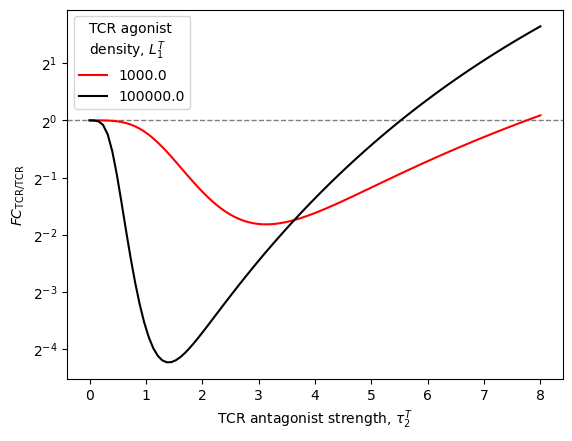

In [10]:
# Define input variables: TCR antigens Ls and taus
# TCR agonist inputs: choose one for each function call
# The full model figure in the paper has three agonist concentrations
# So call compute_fc_tcr_tcr_curve for each if you want to reproduce all curves
# Here, plot only the 10 pM agonist condition, the most interesting one. 
tcr_agonist_tau_l = (10.0, 10.0)  # approx. N4 10 pM = 10 ligands

# TCR antagonist input variable ranges
# Do not use exactly zero, the two-antigen model function crashes
tcr_antagonist_tau_range = np.linspace(0.0, 8.0, 100)
tcr_antagonist_l_range = [1e3, 1e5]  # approx 1 nM and 1 uM

# Compute model curves
tcr_curves, agonist_alone = compute_fc_tcr_tcr_curve(
                                tcr_antagonist_tau_range, 
                                tcr_antagonist_l_range, 
                                tcr_agonist_tau_l, 
                                param_dict_tcr_tcr)


# Plot the results
fig, ax = plt.subplots()
l_hues = {
    tcr_antagonist_l_range[0]:"r", 
    tcr_antagonist_l_range[1]: "k"
}
ax.axhline(1.0, ls="--", color="grey", lw=1.0)
for l_t in tcr_antagonist_l_range:
    yvals = tcr_curves.loc[(l_t, tcr_antagonist_tau_range), "Ratio"]
    ax.plot(tcr_antagonist_tau_range, yvals, color=l_hues[l_t], label=l_t)
ax.set_yscale("log", base=2)
ax.set(
    xlabel=r"TCR antagonist strength, $\tau^T_2$", 
    ylabel=r"$FC_{\mathrm{TCR/TCR}}$",
)
ax.legend(title="TCR agonist \n" + r"density, $L^T_1$")
plt.show()
plt.close()

## TCR/CAR antagonism

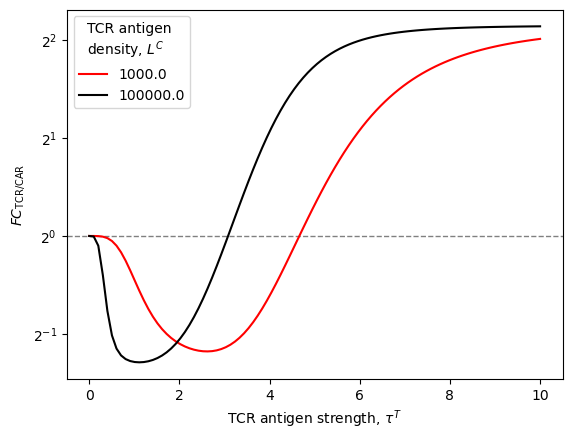

In [11]:
# Define input variables: TCR and CAR antigens Ls and taus
# CAR agonist inputs: choose one tau, L for each function call
# Call the function compute_fc_tcr_car_curve several times
# if you want to vary CAR antigen density, once for each density
# Default CAR parameters: (tau=500.0, L=106510)  CD19 on E2aPBX
car_agonist_tau_l = (500.0, 106510.14384853256)

# TCR antagonist input variable ranges
# Do not use exactly zero, the two-antigen model function crashes
tcr_antigen_tau_range = np.linspace(0.0, 10.0, 100)
tcr_antigen_l_range = [1e3, 1e5]  # approx 1 nM and 1 uM

# Compute model curves
tcrcar_curves, car_ag_alone = compute_fc_tcr_car_curve(
                                tcr_antigen_tau_range, 
                                tcr_antigen_l_range, 
                                car_agonist_tau_l, 
                                param_dict_tcr_car)


# Plot the results
fig, ax = plt.subplots()
l_hues = {
    tcr_antigen_l_range[0]:"r", 
    tcr_antigen_l_range[1]: "k"
}
ax.axhline(1.0, ls="--", color="grey", lw=1.0)
for l_t in tcr_antigen_l_range:
    yvals = tcrcar_curves.loc[(l_t, tcr_antigen_tau_range), "Ratio"]
    ax.plot(tcr_antigen_tau_range, yvals, color=l_hues[l_t], label=l_t)
ax.set_yscale("log", base=2)
ax.set(
    xlabel=r"TCR antigen strength, $\tau^T$", 
    ylabel=r"$FC_{\mathrm{TCR/CAR}}$",
)
ax.legend(title="TCR antigen \n" + r"density, $L^C$")
plt.show()
plt.close()